In [1]:
!pip install opencv-python
!pip install opencv-rolling-ball
!pip install sewar


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
from skimage import io, filters, feature, measure, metrics
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import os
from cv2_rolling_ball import subtract_background_rolling_ball
from sewar import full_ref
from skimage.metrics import structural_similarity as ssim

#Edge detection
from skimage.filters import roberts, sobel, scharr, prewitt, farid, threshold_multiotsu
from scipy import ndimage as nd
from skimage.filters.rank import entropy
from skimage.morphology import disk
import glob
import shutil
from skimage import io
from IPython.core.debugger import Pdb

In [3]:
def generate_GaborFilter(img_file, output_dir):
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    #Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
    #For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

    #Multiple images can be used for training. For that, you need to concatenate the data

    #Save original image pixels into a data frame. This is our Feature #1.
    img2 = img.reshape(-1)
    df = pd.DataFrame()
    df['Original Image'] = img2

    #Generate Gabor features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = theta / 4. * np.pi
        for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
            for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5

                    gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                    ksize=5  #Try 15 for hidden image. Or 9 for others
                    phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                    filtered_img = fimg.reshape(-1)

                    cv2.imwrite('D:/Volvo/'+output_dir+'/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)

                    num += 1  #Increment for gabor column label

    print(df.head())

In [232]:
generate_GaborFilter('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg', 'gabor_filtered_images_0_v1')
generate_GaborFilter('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg', 'gabor_filtered_images_1_v1')

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor111 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor115 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor116 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor117 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor118 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor119 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor120 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor121 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor122 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Ga

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor124 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor125 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor126 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor127 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor128 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor129 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor130 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor131 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor132 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor133 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor134 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor137 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor138 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor139 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor140 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor141 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor142 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor143 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor144 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor145 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor146 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor147 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor148 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

1.5707963267948966 : gamma= 0.05
Gabor150 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor151 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor152 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor153 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor154 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor155 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor156 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor157 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor158 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor159 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor160 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor161 : theta= 3.92699081

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor162 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor163 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor164 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor165 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor166 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor167 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor168 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor169 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor170 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor171 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor172 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor173 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor176 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor177 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor178 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor179 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor180 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor181 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor182 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor183 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor184 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor185 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor186 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor187 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : g

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor190 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor191 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor192 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor193 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor194 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor195 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor196 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor197 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor198 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor199 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor200 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor201 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor202 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor203 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor204 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor205 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor206 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor207 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor208 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor209 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor210 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor211 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor212 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor213 : t

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor215 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor216 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor217 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor218 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor219 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor220 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor221 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor222 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor223 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor224 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor225 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor226 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor227 : t

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: lamda= 0.7853981633974483 : gamma= 0.5
Gabor229 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor230 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor231 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor232 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor233 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor234 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor235 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor236 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor237 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor238 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor239 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor240 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor241 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor242 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor243 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor244 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor245 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor246 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor247 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor248 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor249 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor250 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor251 : theta= 5.497787143782138 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor252 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor255 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor256 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             205       0       0     255     255     173     138      81   
1             207       0       0     255     255     174     139      82   
2             209       0       0     255     255     175     139      82   
3             211       0       0     255     255     176     141      83   
4             212       0       0     255     255     178     142      83   

   Gabor8  Gabor9  ...  Gabor247  Gabor248  Gabor249  Gabor250  Gabor251  \
0      65       0  ...       255       255         0         0       255   
1      65       0  ...       255       255         0         0       255   
2      65       0  ...       255       255         0         0       255   
3      66       0  ...       255       255         0      

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor106 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor107 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor108 : theta= 2.356194490192345 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor109 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor110 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor111 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor113 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor114 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor115 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor116 : theta= 2.356194490192345 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor117 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.5707963267948966

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor120 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor121 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor122 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor123 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor124 : theta= 2.356194490192345 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor125 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor126 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor127 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor128 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor129 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor130 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor131 : theta= 3.141592653589793 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
G

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor134 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor135 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor136 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor137 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor138 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor139 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor140 : theta= 3.141592653589793 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor141 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor142 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor143 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor144 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor145 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor146 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor147 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor148 : theta= 3.141592653589793 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor149 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor150 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor151 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor152 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor153 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.05
Gabor154 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor155 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor156 : theta= 3.141592653589793 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor157 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.5707963267948966

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor160 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor161 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor162 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor163 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor164 : theta= 3.9269908169872414 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor165 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor166 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor167 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor168 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor169 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor170 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor171 : theta= 3.9269908169872414 : sigma= 3 : lamda= 0.7853981633974483 : ga

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 1.5707963267948966 : gamma= 0.05
Gabor174 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor175 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor176 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor177 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor178 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor179 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor180 : theta= 3.9269908169872414 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor181 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor182 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor183 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor184 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor185 : theta

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor187 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor188 : theta= 3.9269908169872414 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor189 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor190 : theta= 3.9269908169872414 : sigma= 7

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor191 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor192 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor193 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor194 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor195 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor196 : theta= 4.71238898038469 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor197 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor198 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor199 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor200 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor201 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor202 : theta= 4.71238898038469 : sig

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor204 : theta= 4.71238898038469 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor205 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor206 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor207 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor208 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor209 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor210 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor211 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor212 : theta= 4.71238898038469 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor213 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor214 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor215 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.3561944901923

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor218 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.0 : gamma= 0.5
Gabor219 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor220 : theta= 4.71238898038469 : sigma= 7 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor221 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor222 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor223 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor224 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor225 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor226 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor227 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor228 : theta= 5.497787143782138 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor229 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.5707963267948966 : gamm

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor233 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor234 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor235 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor236 : theta= 5.497787143782138 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor237 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor238 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor239 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor240 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor241 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.05
Gabor242 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.0 : gamma= 0.5
Gabor243 : theta= 5.497787143782138 : sigma= 5 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor244 : theta= 5.497787143782138 : sigma= 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3747163297.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [4]:
def generate_GaborFilter_v2(img_file, output_dir):
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    #Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
    #For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

    #Multiple images can be used for training. For that, you need to concatenate the data

    #Save original image pixels into a data frame. This is our Feature #1.
    img2 = img.reshape(-1)
    df = pd.DataFrame()
    df['Original Image'] = img2

    #Generate Gabor features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = theta / 4. * np.pi
        for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
            for lamda in np.arange((np.pi / 16) * 10, np.pi, np.pi / 16):   #Range of wavelengths
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5

                    gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                    ksize=5  #Try 15 for hidden image. Or 9 for others
                    phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                    filtered_img = fimg.reshape(-1)

                    cv2.imwrite('D:/Volvo/'+output_dir+'/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)

                    num += 1  #Increment for gabor column label

    print(df.head())

In [234]:
generate_GaborFilter_v2('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg', 'gabor_filtered_images_0_v2')
generate_GaborFilter_v2('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg', 'gabor_filtered_images_1_v2')

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.9634954084936207

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: gamma= 0.5
Gabor105 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor106 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor107 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor108 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor109 : theta= 1.5707963267948966 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor110 : theta= 1.5707963267948966 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor111 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor112 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor113 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor114 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor115 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor116

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor117 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor118 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor119 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor120 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor121 : theta= 1.5707963267948966 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor122 : theta= 1.5707963267948966 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor123 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor124 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor125 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor126 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor127 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor128 : theta= 1.5

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 1.5707963267948966 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor131 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor132 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor133 : theta= 1.5707963267948966 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor134 : theta= 1.5707963267948966 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor135 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor136 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor137 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor138 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor139 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor140 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor141 : theta= 1.5707963267

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor144 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor145 : theta= 2.356194490192345 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor146 : theta= 2.356194490192345 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor147 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor148 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor149 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor150 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor151 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor152 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor153 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor154 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.748893571891068 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor155 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor156 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor157 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor158 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor159 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor160 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor161 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor162 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor163 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor164 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor165 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor166 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor167 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor168 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor169 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor170 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor171 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor172 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor173 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor174 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor175 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor176 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor177 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor178 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor179 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor180 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor181 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor182 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor183 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor184 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor185 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor186 : theta= 2.356194490192

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor188 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor189 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor190 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor191 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor192 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor193 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor194 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor195 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor196 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor197 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor198 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor199 : theta= 3.1415926535897

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor201 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor202 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor203 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor204 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor205 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor206 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor207 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor208 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor209 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor210 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor211 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor212 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor213 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor214 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor215 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor216 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor217 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor218 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor219 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor220 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor221 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor222 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor223 : theta= 3.1415926535897

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor224 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor225 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor226 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor227 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor228 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor229 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor230 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor231 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor232 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor233 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor234 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor235 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor236 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor237 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor238 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor239 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor240 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor241 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor242 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor243 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor244 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor245 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor246 : theta= 3.9269908

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor247 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor248 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor249 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor250 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor251 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor252 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor253 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor254 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor255 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor256 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor257 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor258 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor259 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor260 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor261 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor262 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor263 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor264 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor265 : theta= 3.92

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor267 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor268 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor269 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor270 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor271 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor272 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor273 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor274 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor275 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor276 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor277 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor278 : theta= 3.9

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor281 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor282 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor283 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor284 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor285 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor286 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor287 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor288 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor289 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor290 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor291 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor292 : theta= 4.7123889

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor294 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor295 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor296 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor297 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor298 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor299 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor300 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor301 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor302 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor303 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor304 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor305 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor306 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor307 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor308 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor309 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor310 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor311 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor312 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor313 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor314 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor315 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor316 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor317 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor318 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor319 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor320 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor321 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor322 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor323 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor324 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor325 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor326 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor327 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor328 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor329 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor330 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor331 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor332 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor333 : theta= 4.71238898038469 : sigma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor334 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor335 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor336 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor337 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor338 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor339 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor340 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor341 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor342 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor343 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor344 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor345 : theta= 5.497787143782138

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor347 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor348 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor349 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor350 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor351 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor352 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor353 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor354 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor355 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor356 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor357 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor358 : theta= 5.49778714378

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor362 : theta= 5.497787143782138 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor363 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor364 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor365 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor366 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor367 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor368 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor369 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor370 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor371 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor372 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor373 : theta= 5.4977871437821

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor374 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor375 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor376 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor377 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor378 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor379 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor380 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor381 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor382 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor383 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor384 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
   Original Image  Gabor1  Gabor2

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.9634954084936207

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor105 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor106 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor107 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor108 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor109 : theta= 1.5707963267948966 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor110 : theta= 1.5707963267948966 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor111 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor112 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor113 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor114 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor115 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor116 : theta= 1.5

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 1.5707963267948966 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor118 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor119 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor120 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor121 : theta= 1.5707963267948966 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor122 : theta= 1.5707963267948966 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor123 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor124 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor125 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor126 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor127 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor128 : theta= 1.5707963267948966 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor131 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor132 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor133 : theta= 1.5707963267948966 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor134 : theta= 1.5707963267948966 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor135 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor136 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor137 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor138 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor139 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor140 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor141 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor142 : theta= 1.

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor145 : theta= 2.356194490192345 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor146 : theta= 2.356194490192345 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor147 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor148 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor149 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor150 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor151 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor152 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor153 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor154 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor155 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor156 : theta= 2.3561944901

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor158 : theta= 2.356194490192345 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor159 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor160 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor161 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor162 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor163 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor164 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor165 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor166 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor167 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor168 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor169 : theta= 2.3561944901923

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

1.9634954084936207 : gamma= 0.05
Gabor170 : theta= 2.356194490192345 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor171 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor172 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor173 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor174 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor175 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor176 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor177 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor178 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor179 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor180 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor181 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor182 : theta= 2.356194490192345 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor183 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor184 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor185 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor186 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor187 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor188 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor189 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor190 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor191 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor192 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor193 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor194 : theta= 3.141592653589793 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor195 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor196 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor197 : theta= 3.1415926535897

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor199 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor200 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor201 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor202 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor203 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor204 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor205 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor206 : theta= 3.141592653589793 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor207 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor208 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor209 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor210 : theta= 3.141592653589

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor212 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor213 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor214 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor215 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor216 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor217 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor218 : theta= 3.141592653589793 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor219 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor220 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor221 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor222 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor223 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor224 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor225 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor226 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor227 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor228 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor229 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor230 : theta= 3.141592653589793 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor231 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor232 : theta= 3.141592653589

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor234 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor235 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor236 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor237 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor238 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor239 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor240 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor241 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor242 : theta= 3.9269908169872414 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor243 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor244 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor245 : theta= 3.926990816

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor248 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor249 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor250 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor251 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor252 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor253 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor254 : theta= 3.9269908169872414 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor255 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor256 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor257 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor258 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor259 : theta= 3.92

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor260 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor261 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor262 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor263 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor264 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor265 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor266 : theta= 3.9269908169872414 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor267 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor268 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor269 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor270 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor271 : theta= 3.92

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor272 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor273 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor274 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor275 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor276 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor277 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor278 : theta= 3.9269908169872414 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor279 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor280 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor281 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor282 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor283 : theta= 3.92

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor284 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor285 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor286 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5
Gabor287 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor288 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor289 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor290 : theta= 4.71238898038469 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor291 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor292 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor293 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor294 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor295 : theta= 4.71238898038469

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor297 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor298 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.5
Gabor299 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.05
Gabor300 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.94524311274043 : gamma= 0.5
Gabor301 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor302 : theta= 4.71238898038469 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor303 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor304 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor305 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor306 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor307 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor308 : theta= 4.71238898038469 : sigma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor310 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor311 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor312 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor313 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor314 : theta= 4.71238898038469 : sigma= 5 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor315 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor316 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor317 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor318 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor319 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor320 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor321 : theta= 4.71238898038469 : sigma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor324 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor325 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor326 : theta= 4.71238898038469 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor327 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor328 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor329 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor330 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor331 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor332 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor333 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.05
Gabor334 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.748893571891068 : gamma= 0.5


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor335 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.05
Gabor336 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.94524311274043 : gamma= 0.5
Gabor337 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor338 : theta= 5.497787143782138 : sigma= 1 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor339 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor340 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor341 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor342 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor343 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor344 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor345 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.748893571891068 : gamma= 0.05
Gabor346 : theta= 5.4977871437821

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor350 : theta= 5.497787143782138 : sigma= 3 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor351 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor352 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.1598449493429825 : gamma= 0.5
Gabor353 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor354 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor355 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor356 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor357 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.05
Gabor358 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.748893571891068 : gamma= 0.5
Gabor359 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.05
Gabor360 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.94524311274043 : gamma= 0.5
Gabor361 : theta= 5.4977871437821

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor365 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.05
Gabor366 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.3561944901923444 : gamma= 0.5
Gabor367 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.05
Gabor368 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.5525440310417062 : gamma= 0.5
Gabor369 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.05
Gabor370 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.748893571891068 : gamma= 0.5
Gabor371 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.05
Gabor372 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.94524311274043 : gamma= 0.5
Gabor373 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.05
Gabor374 : theta= 5.497787143782138 : sigma= 7 : lamda= 1.9634954084936207 : gamma= 0.5
Gabor375 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.1598449493429825 : gamma= 0.05
Gabor376 : theta= 5.497787143782

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\2166135749.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [5]:
def generate_GaborFilter_v3(img_file, output_dir):
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    #Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
    #For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

    #Multiple images can be used for training. For that, you need to concatenate the data

    #Save original image pixels into a data frame. This is our Feature #1.
    img2 = img.reshape(-1)
    df = pd.DataFrame()
    df['Original Image'] = img2

    #Generate Gabor features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(16):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = theta / 8. * np.pi
        for sigma in (1, 3, 5, 7, 9, 11):  #Sigma with values of 1 and 3
            for gamma in (0.005, 0.01, 0.05, 0.1, 0.5, 0.9):   #Gamma values of 0.05 and 0.5
                
                lamda = (np.pi / 4) * 3

                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
    #                print(gabor_label)
                ksize=5  #Try 15 for hidden image. Or 9 for others
                phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                filtered_img = fimg.reshape(-1)

                cv2.imwrite('D:/Volvo/'+output_dir+'/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)

                num += 1  #Increment for gabor column label

    print(df.head())

In [236]:
generate_GaborFilter_v3('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg', 'gabor_filtered_images_0_v3')
generate_GaborFilter_v3('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg', 'gabor_filtered_images_1_v3')

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor7 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor8 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor13 : theta= 0.0 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor14 : theta= 0.0 : sigma= 5 : lamda= 2.356194490192345 : ga

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

0.005
Gabor110 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor111 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor113 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor114 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor115 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor116 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor117 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor118 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor119 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor120 : theta=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor121 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor122 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor123 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor124 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor125 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor126 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor127 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor128 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor129 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor130 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor131 : theta= 1.1780972450961724 : si

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor133 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor134 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor135 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor136 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor137 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor138 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor139 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor140 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor141 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor142 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor143 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor145 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor146 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor147 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor148 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor149 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor150 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor151 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor152 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor153 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor154 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor155 : theta= 1.5707963267948966 : sigma= 3 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: lamda= 2.356194490192345 : gamma= 0.5
Gabor156 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor157 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor158 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor159 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor160 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor161 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor162 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor163 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor164 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor165 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor166 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.3561944901923

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor168 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor169 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor170 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor171 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor172 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor173 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor174 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor175 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor176 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor177 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor178 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor179 : theta= 1.

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor182 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor183 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor184 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor185 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor186 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor187 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor188 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor189 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor190 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor191 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor192 : theta= 1.9634954084936

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor195 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor196 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor197 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor198 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor199 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor200 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor201 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor202 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor203 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor204 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor205 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor206 : theta= 1.96349

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor209 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor210 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor211 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor212 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor213 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor214 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor215 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor216 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor217 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor218 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor219 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor220 : theta= 2.3

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor223 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor224 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor225 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor226 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor227 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor228 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor229 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor230 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor231 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor232 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor233 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor234 : theta= 2.356194490192345

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

0.9
Gabor247 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor248 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor249 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor250 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor251 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor252 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor253 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor254 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor255 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor256 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor257 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor258 : theta= 2.74889

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor262 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor263 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor264 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor265 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor266 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor267 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor268 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor269 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor270 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor271 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor272 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor273 : theta= 2.748893571891069 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor275 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor276 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor277 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor278 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor279 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor280 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor281 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor282 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor283 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor284 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor285 : theta= 2.748893571891069 : sigma

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.1
Gabor287 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor288 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor289 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor290 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor291 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor292 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor293 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor294 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor295 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor296 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor297 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Ga

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor300 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor301 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor302 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor303 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor304 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor305 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor306 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor307 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor308 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor309 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor310 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor311 : theta= 3.141592653589793

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor314 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor315 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor316 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor317 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor318 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor319 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor320 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor321 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor322 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor323 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor324 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor325 : theta= 3.53429173528

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor329 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor330 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor331 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor332 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor333 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor334 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor335 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor336 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor337 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor338 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor339 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor340 : theta= 3.5342

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor343 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor344 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor345 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor346 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor347 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor348 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor349 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor350 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor351 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor352 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor353 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.3

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor356 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor357 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor358 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor359 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor360 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor361 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor362 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor363 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor364 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor365 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor366 : theta= 3.9269908

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor368 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor369 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor370 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor371 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor372 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor373 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor374 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor375 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor376 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor377 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor378 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor379 : theta= 3.926990

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor383 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor384 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor385 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor386 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor387 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor388 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor389 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor390 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor391 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor392 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor393 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor394 : theta= 3.9

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor397 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor398 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor399 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor400 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor401 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor402 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor403 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor404 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor405 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor406 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor407 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor408 : theta= 4.319689898685965

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor411 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor412 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor413 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor414 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor415 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor416 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor417 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor418 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor419 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor420 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor421 : theta= 4.319689898685965 : sigma= 9

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor424 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor425 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor426 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor427 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor428 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor429 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor430 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor431 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor432 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor433 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor434 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor435 : theta= 4.712388980384

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.5
Gabor438 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor439 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor440 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor441 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor442 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor443 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor444 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor445 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor446 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor447 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor448 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor449 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.9
Gabor451 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor452 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor453 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor454 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor455 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor456 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor457 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor458 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor459 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor460 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor461 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor462 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor464 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor465 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor466 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor467 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor468 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor469 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor470 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor471 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor472 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor473 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor474 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor475 : theta= 5.105088062083414 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor478 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor479 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor480 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor481 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor482 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor483 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor484 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor485 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor486 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor487 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor488 : theta= 5.105088062083414 : sigma= 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor491 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor492 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor493 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor494 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor495 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor496 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor497 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor498 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor499 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor500 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor501 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor502 : theta= 5.105088062083

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor506 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor507 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor508 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor509 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor510 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor511 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor512 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor513 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor514 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor515 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor516 : theta= 5.497787143782138 : sigma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.01
Gabor519 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor520 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor521 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor522 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor523 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor524 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor525 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor526 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor527 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor528 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor529 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabo

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor532 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor533 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor534 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor535 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor536 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor537 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor538 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor539 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor540 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor541 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor542 : theta= 5.890486225480862 : s

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor547 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor548 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor549 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor550 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor551 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor552 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor553 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor554 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor555 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor556 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor557 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor558 : theta= 5.890486225480862

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor562 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor563 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor564 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor565 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor566 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor567 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor568 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor569 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor570 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor571 : theta= 5.890486225480862 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor572 : theta= 5.890486225480862 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor573 : theta= 5.89048622548086

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: lamda= 2.356194490192345 : gamma= 0.05
Gabor112 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor113 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor114 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor115 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor116 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor117 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor118 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor119 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor120 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor121 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor122 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.35619449019234

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor125 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor126 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor127 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor128 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor129 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor130 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor131 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor132 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor133 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor134 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor135 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor136 : theta= 1.1780

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor140 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor141 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor142 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor143 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor144 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor145 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor146 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor147 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor148 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor149 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor150 : theta= 1.5707963267948966 : sigma= 1 : lamda

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor153 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor154 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor155 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor156 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor157 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor158 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor159 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor160 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor161 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor162 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor163 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor164 : theta= 1.57079

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

0.5
Gabor168 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor169 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor170 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor171 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor172 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor173 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor174 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor175 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor176 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor177 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor178 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor179 : theta

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: lamda= 2.356194490192345 : gamma= 0.9
Gabor181 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor182 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor183 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor184 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor185 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor186 : theta= 1.9634954084936207 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor187 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor188 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor189 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor190 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor191 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.3561944901923

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor192 : theta= 1.9634954084936207 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor193 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor194 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor195 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor196 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor197 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor198 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor199 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor200 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor201 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor202 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor203 : theta= 1.9634

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor206 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor207 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor208 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor209 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor210 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor211 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor212 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor213 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor214 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor215 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor216 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor217 : theta= 2.

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor221 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor222 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor223 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor224 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor225 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor226 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor227 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor228 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor229 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor230 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor231 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor232 : theta= 2.356194490192345

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor235 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor236 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor237 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor238 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor239 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor240 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor241 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor242 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor243 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor244 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor245 : theta= 2.356194490192345 : sigma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor249 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor250 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor251 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor252 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor253 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor254 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor255 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor256 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor257 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor258 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor259 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.3561944901

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor262 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor263 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor264 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor265 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor266 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor267 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor268 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor269 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor270 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor271 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor272 : theta= 2.748893571891069 : sigma= 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor274 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor275 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor276 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor277 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor278 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor279 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor280 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor281 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor282 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor283 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor284 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor285 : theta= 2.74889357189106

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor288 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor289 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor290 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor291 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor292 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor293 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor294 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor295 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor296 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor297 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor298 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor299 : theta= 3.14159265358979

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor302 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor303 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor304 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor305 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor306 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor307 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor308 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor309 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor310 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor311 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor312 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor313 : theta= 3.141592653589793 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor316 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor317 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor318 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor319 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor320 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor321 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor322 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor323 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor324 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor325 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor326 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor329 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor330 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor331 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor332 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor333 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor334 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor335 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor336 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor337 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor338 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor339 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor342 : theta= 3.5342917352885173 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor343 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor344 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor345 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor346 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor347 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor348 : theta= 3.5342917352885173 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor349 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor350 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor351 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor352 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor353 : theta= 3.5342

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor356 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor357 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor358 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor359 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor360 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor361 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor362 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor363 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor364 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor365 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor366 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor367 : theta= 3.9

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor369 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor370 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor371 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor372 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor373 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor374 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor375 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor376 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor377 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor378 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor379 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor380 : theta= 3.92699

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor383 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor384 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor385 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor386 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor387 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor388 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor389 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor390 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor391 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor392 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor393 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor394 : theta= 3.9

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor398 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor399 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor400 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor401 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor402 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor403 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor404 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor405 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor406 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor407 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor408 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor409 : theta= 4.319689898685965 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor412 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor413 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor414 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor415 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor416 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor417 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor418 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor419 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor420 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor421 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor422 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor423 : theta= 4.319689898685965 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor426 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor427 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor428 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor429 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor430 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor431 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor432 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor433 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor434 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor435 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor436 : theta= 4.71238898038469 : sigm

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor453 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor454 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor455 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor456 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor457 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor458 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor459 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor460 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor461 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor462 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor463 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor464 : theta= 4.71238898038469 : sigma= 11

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor467 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor468 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor469 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor470 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor471 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor472 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor473 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor474 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor475 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor476 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor477 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor478 : theta= 5.105088062083414

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor481 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor482 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor483 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor484 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor485 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor486 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor487 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor488 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor489 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor490 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor491 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor492 : theta= 5.105088062083414

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor495 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor496 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor497 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor498 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor499 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor500 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor501 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor502 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor503 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor504 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor505 : theta= 5.497787143782138 : si

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor508 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor509 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor510 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor511 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor512 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor513 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor514 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor515 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor516 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor517 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor518 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor519 : theta= 5.497787143782138 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor523 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor524 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor525 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor526 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor527 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor528 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor529 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor530 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor531 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor532 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor533 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor534 : theta= 5.497787143782138

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor535 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor536 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor537 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor538 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor539 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor540 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor541 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor542 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor543 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor544 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor545 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor546 : theta= 5.890486225

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor550 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor551 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor552 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor553 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor554 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor555 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor556 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor557 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor558 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor559 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor560 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor561 : theta= 5.890486225480862 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor564 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor565 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor566 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor567 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor568 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor569 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor570 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor571 : theta= 5.890486225480862 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor572 : theta= 5.890486225480862 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor573 : theta= 5.890486225480862 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor574 : theta= 5.890486225480862 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor575 : theta= 5.89048622548

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

In [6]:
def generate_GaborFilter_v4(img_file, output_dir):
    img = cv2.imread(img_file, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    #Here, if you have multichannel image then extract the right channel instead of converting the image to grey. 
    #For example, if DAPI contains nuclei information, extract the DAPI channel image first. 

    #Multiple images can be used for training. For that, you need to concatenate the data

    #Save original image pixels into a data frame. This is our Feature #1.
    img2 = img.reshape(-1)
    df = pd.DataFrame()
    df['Original Image'] = img2

    #Generate Gabor features
    num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop
    for theta in range(8):   #Define number of thetas. Here only 2 theta values 0 and 1/4 . pi 
        theta = theta / 4. * np.pi
        for sigma in (1, 3, 5, 7):  #Sigma with values of 1 and 3
            #for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for ksize in (3, 5, 7, 9):   #Range of ksize
                for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5

                    gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                    
    #                print(gabor_label)
                    #ksize=5  #Try 15 for hidden image. Or 9 for others
                    lamda = (np.pi / 4) * 3
        
                    phi = 0  #0.8 for hidden image. Otherwise leave it to 0
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter the image and add values to a new column 
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
                    filtered_img = fimg.reshape(-1)

                    cv2.imwrite('D:/Volvo/'+output_dir+'/'+gabor_label+'.jpg', filtered_img.reshape(img.shape))

                    df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                    print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': gamma=', gamma, ': ksize=', ksize, ': lamda=', lamda)

                    num += 1  #Increment for gabor column label

    print(df.head())
    
    df.to_csv('D:\\Volvo\\Gabor.csv')

In [238]:
generate_GaborFilter_v4('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg', 'gabor_filtered_images_0')
generate_GaborFilter_v4('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg', 'gabor_filtered_images_1')

Gabor1 : theta= 0.0 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor2 : theta= 0.0 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor3 : theta= 0.0 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor4 : theta= 0.0 : sigma= 1 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor5 : theta= 0.0 : sigma= 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor6 : theta= 0.0 : sigma= 1 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor7 : theta= 0.0 : sigma= 1 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor8 : theta= 0.0 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor9 : theta= 0.0 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor10 : theta= 0.0 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor11 : theta= 0.0 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor12 : theta= 0.0 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor13

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor109 : theta= 2.356194490192345 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor110 : theta= 2.356194490192345 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor111 : theta= 2.356194490192345 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor112 : theta= 2.356194490192345 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor113 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor114 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor115 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor116 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor117 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor118 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor119 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor123 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor124 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor125 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor126 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor127 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor128 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor129 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor130 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor131 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor132 : theta= 3.1415

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor136 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor137 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor138 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor139 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor140 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor141 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor142 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor143 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor144 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor145 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor146 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor150 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor151 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor152 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor153 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor154 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor155 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor156 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor157 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor158 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor159 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor160 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor162 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor163 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor164 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor165 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor166 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor167 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor168 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor169 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor170 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor171 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor175 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor176 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor177 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor178 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor179 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor180 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor181 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor182 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor183 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor184 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor188 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor189 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor190 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor191 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor192 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor193 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor194 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor195 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor196 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor197 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor198 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor202 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor203 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor204 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor205 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor206 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor207 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor208 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor209 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor210 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor211 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor212 : theta= 4.71238

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor217 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor218 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor219 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor220 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor221 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor222 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor223 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor224 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor225 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor226 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor227 : theta= 5.497

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor230 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor231 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor232 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor233 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor234 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor235 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor236 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor237 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor238 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor239 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.0

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.497787143782138 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor243 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor244 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor245 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor246 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor247 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor248 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor249 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor250 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor251 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor252 : theta= 5.4977

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.497787143782138 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor255 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor256 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             205       0       0      81      65     110      72     140   
1             207       0       0      82      65     110      73     141   
2             209       0       0      82      65     110      73     141   
3             211       0       0      83      66     111      74     142   
4             212       0       0      83      66     112      74     142   

   Gabor8  Gabor9  ...  Gabor247  Gabor248  Gabor249  Gabor250  Gabor251  \
0      77       0  ...       194       164        37        36       255   
1      77       0  ...       195       166        38        36       255   
2      77       0  ... 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor112 : theta= 2.356194490192345 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor113 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor114 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor115 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor116 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor117 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor118 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor119 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor120 : theta= 2.356194490192345 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor121 : theta= 2.3561944901923

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor125 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor126 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor127 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor128 : theta= 2.356194490192345 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor129 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor130 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor131 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor132 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor133 : theta= 3.141592653589793 : sigma= 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor134 : theta= 3.1415

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 2.356194490192345
Gabor137 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor138 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor139 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor140 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor141 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor142 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor143 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor144 : theta= 3.141592653589793 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor145 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor146 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor150 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor151 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor152 : theta= 3.141592653589793 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor153 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor154 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor155 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor156 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor157 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor158 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor159 : theta= 3.141592653589793 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor160 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor163 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor164 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor165 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor166 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor167 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor168 : theta= 3.9269908169872414 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor169 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor170 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor171 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor172 : theta= 3.9269908169872414 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor177 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor178 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor179 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor180 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor181 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor182 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor183 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor184 : theta= 3.9269908169872414 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor185 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor186 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor191 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor192 : theta= 3.9269908169872414 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor193 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor194 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor195 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor196 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor197 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor198 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor199 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor200 : theta= 4.71238898038469 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor201 : theta= 4.7

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor205 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor206 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor207 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor208 : theta= 4.71238898038469 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor209 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor210 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor211 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor212 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor213 : theta= 4.71238898038469 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor214 : theta= 4.71238898038469

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor218 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor219 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor220 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor221 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor222 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor223 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor224 : theta= 4.71238898038469 : sigma= 7 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor225 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor226 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor227 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor228 : theta= 5.49

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor232 : theta= 5.497787143782138 : sigma= 1 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor233 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor234 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor235 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor236 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor237 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor238 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor239 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor240 : theta= 5.497787143782138 : sigma= 3 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor241 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor242 : thet

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

5 : lamda= 2.356194490192345
Gabor245 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor246 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.5 : ksize= 7 : lamda= 2.356194490192345
Gabor247 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.05 : ksize= 9 : lamda= 2.356194490192345
Gabor248 : theta= 5.497787143782138 : sigma= 5 : gamma= 0.5 : ksize= 9 : lamda= 2.356194490192345
Gabor249 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.05 : ksize= 3 : lamda= 2.356194490192345
Gabor250 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.5 : ksize= 3 : lamda= 2.356194490192345
Gabor251 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.05 : ksize= 5 : lamda= 2.356194490192345
Gabor252 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.5 : ksize= 5 : lamda= 2.356194490192345
Gabor253 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.05 : ksize= 7 : lamda= 2.356194490192345
Gabor254 : theta= 5.497787143782138 : sigma= 7 : gamma= 0.5 : ksize= 7 : lamda= 2.35

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\1430543911.py:39: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

   Original Image  Gabor1  Gabor2  Gabor3  Gabor4  Gabor5  Gabor6  Gabor7  \
0             211       0       0      83      66     112      74     143   
1             211       0       0      83      66     112      74     144   
2             212       0       0      84      67     112      75     144   
3             215       0       0      84      67     113      75     145   
4             218       0       0      85      68     114      76     146   

   Gabor8  Gabor9  ...  Gabor247  Gabor248  Gabor249  Gabor250  Gabor251  \
0      78       0  ...       202       172        39        37       255   
1      78       0  ...       200       170        39        37       255   
2      79       0  ...       198       168        39        37       255   
3      79       0  ...       199       169        40        38       255   
4      80       0  ...       200       170        40        38       255   

   Gabor252  Gabor253  Gabor254  Gabor255  Gabor256  
0       255        59     

In [239]:
generate_GaborFilter_v3('D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_311_000030.jpg', 'gabor_filtered_images')

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor7 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor8 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor13 : theta= 0.0 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor14 : theta= 0.0 : sigma= 5 : lamda= 2.356194490192345 : ga

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor112 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor113 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor114 : theta= 1.1780972450961724 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor115 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor116 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor117 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor118 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor119 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor120 : theta= 1.1780972450961724 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor121 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor122 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor123 : theta= 1.17809

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor125 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor126 : theta= 1.1780972450961724 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor127 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor128 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor129 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor130 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor131 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor132 : theta= 1.1780972450961724 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor133 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor134 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor135 : theta= 1.1780972450961724 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor136 : theta= 1.1780

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor139 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor140 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor141 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor142 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor143 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor144 : theta= 1.1780972450961724 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor145 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor146 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor147 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor148 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor149 : theta= 1.5707963267948966 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor150 : theta= 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor153 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor154 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor155 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor156 : theta= 1.5707963267948966 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor157 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor158 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor159 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor160 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor161 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor162 : theta= 1.5707963267948966 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor163 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor164 : theta= 1.57079

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor167 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor168 : theta= 1.5707963267948966 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor169 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor170 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor171 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor172 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor173 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor174 : theta= 1.5707963267948966 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor175 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor176 : theta= 1.5707963267948966 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor177 : theta= 1.570796326794

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor195 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor196 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor197 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor198 : theta= 1.9634954084936207 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor199 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor200 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor201 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor202 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor203 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor204 : theta= 1.9634954084936207 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor205 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor206 : theta= 1.96349

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor210 : theta= 1.9634954084936207 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor211 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor212 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor213 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor214 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor215 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor216 : theta= 1.9634954084936207 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor217 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor218 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor219 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor220 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor221 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor222 : theta= 2.356194490192345 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor223 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor224 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor225 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor226 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor227 : theta= 2.356194490192345 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor228 : theta= 2.356194490192345 : sigma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor230 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor231 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor232 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor233 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor234 : theta= 2.356194490192345 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor235 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor236 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor237 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor238 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor239 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor240 : theta= 2.356194490192345 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor241 : theta= 2.356194490192345 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor244 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor245 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor246 : theta= 2.356194490192345 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor247 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor248 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor249 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor250 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor251 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor252 : theta= 2.356194490192345 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor253 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor254 : theta= 2.748893571891069 : s

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor257 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor258 : theta= 2.748893571891069 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor259 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor260 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor261 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor262 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor263 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor264 : theta= 2.748893571891069 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor265 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor266 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor267 : theta= 2.748893571891069 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor268 : theta= 2.748893571891069

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.9
Gabor271 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor272 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor273 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor274 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor275 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor276 : theta= 2.748893571891069 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor277 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor278 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor279 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor280 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor281 : theta= 2.748893571891069 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabo

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.005
Gabor284 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor285 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor286 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor287 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor288 : theta= 2.748893571891069 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor289 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor290 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor291 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor292 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor293 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor294 : theta= 3.141592653589793 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor297 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor298 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor299 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor300 : theta= 3.141592653589793 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor301 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor302 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor303 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor304 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor305 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor306 : theta= 3.141592653589793 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor307 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor308 : theta= 3.141592653589793 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.1
Gabor311 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor312 : theta= 3.141592653589793 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor313 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor314 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor315 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor316 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor317 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor318 : theta= 3.141592653589793 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor319 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor320 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor321 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
G

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor323 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor324 : theta= 3.141592653589793 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor325 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor326 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor327 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor328 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor329 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor330 : theta= 3.5342917352885173 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor331 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor332 : theta= 3.5342917352885173 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor333 : theta= 3.53429173528851

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: gamma= 0.005
Gabor350 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor351 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor352 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor353 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor354 : theta= 3.5342917352885173 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor355 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor356 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor357 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor358 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor359 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor360 : theta= 3.5342917352885173 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor362 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor363 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor364 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor365 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor366 : theta= 3.9269908169872414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor367 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor368 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor369 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor370 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor371 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor372 : theta= 3.9269908169872414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor373 : theta= 3.926990

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor376 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor377 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor378 : theta= 3.9269908169872414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor379 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor380 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor381 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor382 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor383 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor384 : theta= 3.9269908169872414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor385 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor386 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor387 : theta= 3.92699

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

2.356194490192345 : gamma= 0.5
Gabor390 : theta= 3.9269908169872414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor391 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor392 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor393 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor394 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor395 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor396 : theta= 3.9269908169872414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor397 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor398 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor399 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor400 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : ga

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor402 : theta= 4.319689898685965 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor403 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor404 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor405 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor406 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor407 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor408 : theta= 4.319689898685965 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor409 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor410 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor411 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor412 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamm

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor414 : theta= 4.319689898685965 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor415 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor416 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor417 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor418 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor419 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor420 : theta= 4.319689898685965 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor421 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor422 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor423 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor424 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamm

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor426 : theta= 4.319689898685965 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor427 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor428 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor429 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor430 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor431 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor432 : theta= 4.319689898685965 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor433 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.005
Gabor434 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.01
Gabor435 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor436 : theta= 4.71238898038469 : sigma= 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor437 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor438 : theta= 4.71238898038469 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor439 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor440 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor441 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor442 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor443 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor444 : theta= 4.71238898038469 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor445 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor446 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor447 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor448 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor449 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor450 : theta= 4.71238898038469 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor451 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor452 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor453 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor454 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor455 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor456 : theta= 4.71238898038469 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor457 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor458 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor459 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor460 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor461 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor462 : theta= 4.71238898038469 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor463 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor464 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor465 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor466 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor467 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor468 : theta= 4.71238898038469 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor469 : theta= 5.105088062083414 : sigma= 1 : la

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

: theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor472 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor473 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor474 : theta= 5.105088062083414 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor475 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor476 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor477 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor478 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor479 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor480 : theta= 5.105088062083414 : sigma= 3 : lamda= 2.356194490192345 : gamma=

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

 0.9
Gabor481 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor482 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor483 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor484 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor485 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor486 : theta= 5.105088062083414 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor487 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor488 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor489 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor490 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor491 : theta= 5.105088062083414 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor492 : theta= 5.1050880620

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor494 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor495 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor496 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor497 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor498 : theta= 5.105088062083414 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor499 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor500 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor501 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor502 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor503 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor504 : theta= 5.105088062083414 : sigma= 11 : lamda= 2.356194490192345 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor508 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.1
Gabor509 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor510 : theta= 5.497787143782138 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor511 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor512 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor513 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor514 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor515 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor516 : theta= 5.497787143782138 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor517 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor518 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor519 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor520 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.1
Gabor521 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.5
Gabor522 : theta= 5.497787143782138 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.9
Gabor523 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.005
Gabor524 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor525 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor526 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor527 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor528 : theta= 5.497787143782138 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor529 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor530 : theta= 5.497787143782138 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor531 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor532 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor533 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor534 : theta= 5.497787143782138 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor535 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.005
Gabor536 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.01
Gabor537 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.05
Gabor538 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.1
Gabor539 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.5
Gabor540 : theta= 5.497787143782138 : sigma= 11 : lamda= 2.356194490192345 : gamma= 0.9
Gabor541 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : 

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor545 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor546 : theta= 5.890486225480862 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.9
Gabor547 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.005
Gabor548 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.01
Gabor549 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.05
Gabor550 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.1
Gabor551 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.5
Gabor552 : theta= 5.890486225480862 : sigma= 3 : lamda= 2.356194490192345 : gamma= 0.9
Gabor553 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.005
Gabor554 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.01
Gabor555 : theta= 5.890486225480862 : sigma= 5 : lamda= 2.356194490192345 : gamma= 0.05
Gabor556 : theta= 5.890486225480862

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

Gabor560 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.01
Gabor561 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.05
Gabor562 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.1
Gabor563 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.5
Gabor564 : theta= 5.890486225480862 : sigma= 7 : lamda= 2.356194490192345 : gamma= 0.9
Gabor565 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.005
Gabor566 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.01
Gabor567 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.05
Gabor568 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.1
Gabor569 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.5
Gabor570 : theta= 5.890486225480862 : sigma= 9 : lamda= 2.356194490192345 : gamma= 0.9
Gabor571 : theta= 5.890486225480862 :

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_6820\3628966484.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling 

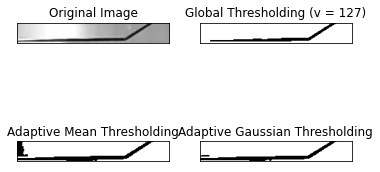

In [8]:
img = cv2.imread('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

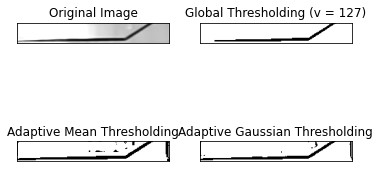

In [6]:
img = cv2.imread('D:\Volvo\gabor_filtered_images_0\Gabor12.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

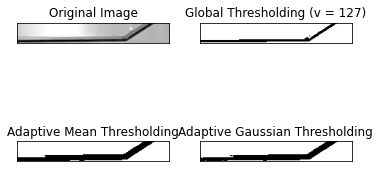

In [11]:
img = cv2.imread('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

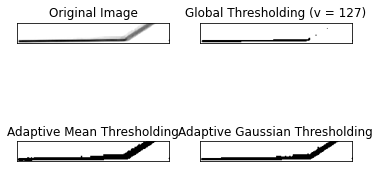

In [35]:
img = cv2.imread('D:\Volvo\gabor_filtered_images_1_v3\Gabor235.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

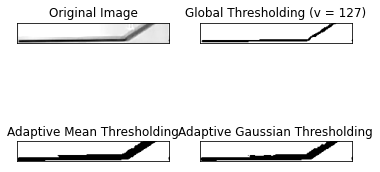

In [36]:
img = cv2.imread('D:\Volvo\gabor_filtered_images_1_v3\Gabor234.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

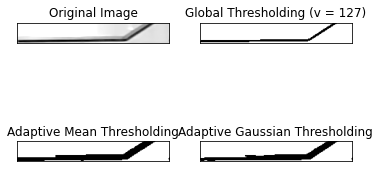

In [37]:
img = cv2.imread('D:\Volvo\gabor_filtered_images_1\Gabor12.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [38]:
img = cv2.imread('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg', 0)

img = cv2.medianBlur(img,3)
 
th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
cv2.imwrite('D:/Volvo/Theshold Images/Original_0_Mean.jpg', th_mean)
cv2.imwrite('D:/Volvo/Theshold Images/Original_0_Gaussian.jpg', th_gaussian)

gabor_image_files = glob.glob("D:\Volvo\gabor_filtered_images_0\*.*")
gabor_image_files.sort(key=os.path.getmtime)

for image_file in gabor_image_files:
    img = cv2.imread(image_file, 0)
    img = cv2.medianBlur(img,3)
    
    th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0]
 
    print(image_file)
    cv2.imwrite('D:/Volvo/Theshold Images/' + img_file_name + '_0_Mean.jpg', th_mean)
    cv2.imwrite('D:/Volvo/Theshold Images/' + img_file_name + '_0_Gaussian.jpg', th_gaussian)

D:\Volvo\gabor_filtered_images_0\Gabor1.jpg
D:\Volvo\gabor_filtered_images_0\Gabor2.jpg
D:\Volvo\gabor_filtered_images_0\Gabor3.jpg
D:\Volvo\gabor_filtered_images_0\Gabor4.jpg
D:\Volvo\gabor_filtered_images_0\Gabor5.jpg
D:\Volvo\gabor_filtered_images_0\Gabor6.jpg
D:\Volvo\gabor_filtered_images_0\Gabor7.jpg
D:\Volvo\gabor_filtered_images_0\Gabor8.jpg
D:\Volvo\gabor_filtered_images_0\Gabor10.jpg
D:\Volvo\gabor_filtered_images_0\Gabor11.jpg
D:\Volvo\gabor_filtered_images_0\Gabor12.jpg
D:\Volvo\gabor_filtered_images_0\Gabor13.jpg
D:\Volvo\gabor_filtered_images_0\Gabor14.jpg
D:\Volvo\gabor_filtered_images_0\Gabor15.jpg
D:\Volvo\gabor_filtered_images_0\Gabor9.jpg
D:\Volvo\gabor_filtered_images_0\Gabor16.jpg
D:\Volvo\gabor_filtered_images_0\Gabor17.jpg
D:\Volvo\gabor_filtered_images_0\Gabor18.jpg
D:\Volvo\gabor_filtered_images_0\Gabor19.jpg
D:\Volvo\gabor_filtered_images_0\Gabor20.jpg
D:\Volvo\gabor_filtered_images_0\Gabor21.jpg
D:\Volvo\gabor_filtered_images_0\Gabor22.jpg
D:\Volvo\gabor_filt

In [39]:
img = cv2.imread('D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg', 0)

img = cv2.medianBlur(img,3)
 
th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
cv2.imwrite('D:/Volvo/Theshold Images/Original_1_Mean.jpg', th_mean)
cv2.imwrite('D:/Volvo/Theshold Images/Original_1_Gaussian.jpg', th_gaussian)

gabor_image_files = glob.glob("D:\Volvo\gabor_filtered_images_1\*.*")
gabor_image_files.sort(key=os.path.getmtime)

for image_file in gabor_image_files:
    img = cv2.imread(image_file, 0)
    img = cv2.medianBlur(img,3)
    
    th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0]
 
    print(image_file)
    cv2.imwrite('D:/Volvo/Theshold Images/' + img_file_name + '_1_Mean.jpg', th_mean)
    cv2.imwrite('D:/Volvo/Theshold Images/' + img_file_name + '_1_Gaussian.jpg', th_gaussian)

D:\Volvo\gabor_filtered_images_1\Gabor1.jpg
D:\Volvo\gabor_filtered_images_1\Gabor2.jpg
D:\Volvo\gabor_filtered_images_1\Gabor3.jpg
D:\Volvo\gabor_filtered_images_1\Gabor4.jpg
D:\Volvo\gabor_filtered_images_1\Gabor5.jpg
D:\Volvo\gabor_filtered_images_1\Gabor6.jpg
D:\Volvo\gabor_filtered_images_1\Gabor7.jpg
D:\Volvo\gabor_filtered_images_1\Gabor10.jpg
D:\Volvo\gabor_filtered_images_1\Gabor11.jpg
D:\Volvo\gabor_filtered_images_1\Gabor12.jpg
D:\Volvo\gabor_filtered_images_1\Gabor13.jpg
D:\Volvo\gabor_filtered_images_1\Gabor8.jpg
D:\Volvo\gabor_filtered_images_1\Gabor9.jpg
D:\Volvo\gabor_filtered_images_1\Gabor14.jpg
D:\Volvo\gabor_filtered_images_1\Gabor15.jpg
D:\Volvo\gabor_filtered_images_1\Gabor16.jpg
D:\Volvo\gabor_filtered_images_1\Gabor17.jpg
D:\Volvo\gabor_filtered_images_1\Gabor18.jpg
D:\Volvo\gabor_filtered_images_1\Gabor19.jpg
D:\Volvo\gabor_filtered_images_1\Gabor20.jpg
D:\Volvo\gabor_filtered_images_1\Gabor21.jpg
D:\Volvo\gabor_filtered_images_1\Gabor22.jpg
D:\Volvo\gabor_filt

In [40]:
def calculate_imageError(img_file, ref_img_file):
    ref_img = cv2.imread(ref_img_file, 1)
    img = cv2.imread(img_file, 1)

    mse_skimg = metrics.mean_squared_error(ref_img, img)
    print("MSE: based on scikit-image = ", mse_skimg)

    psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None)
    print("PSNR: based on scikit-image = ", psnr_skimg)

    rmse_skimg = metrics.normalized_root_mse(ref_img, img)
    print("RMSE: based on scikit-image = ", rmse_skimg)

    ssim_skimg = ssim(ref_img, img,
                      data_range = img.max() - img.min(), 
                      multichannel = True)
    print("SSIM: based on scikit-image = ", ssim_skimg)

    psnr_img=full_ref.psnr(ref_img, img, MAX=None)

    print("PSNR: peak signal-to-noise ratio = ", psnr_img)

In [41]:
calculate_imageError('D:\Volvo\BatteryLid Images Cycle Gabor Threshold Gaussian\BatteryLid000002_0.jpg', 'D:\Volvo\BatteryLid Images Cycle Gabor Threshold Gaussian\BatteryLid000002_1.jpg')

MSE: based on scikit-image =  4381.992044685173
PSNR: based on scikit-image =  11.71408776085138
RMSE: based on scikit-image =  0.287940224262394
SSIM: based on scikit-image =  0.8141101538587989
PSNR: peak signal-to-noise ratio =  11.71408776085138


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_13792\2444997665.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(ref_img, img,


In [42]:
calculate_imageError('D:\Volvo\Theshold Images\Original_0_Mean.jpg', 'D:\Volvo\Theshold Images\Original_1_Mean.jpg')

MSE: based on scikit-image =  8286.376777251186
PSNR: based on scikit-image =  8.947156843119952
RMSE: based on scikit-image =  0.4094293936741384
SSIM: based on scikit-image =  0.6743933421182545
PSNR: peak signal-to-noise ratio =  8.947156843119952


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_13792\2444997665.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(ref_img, img,


In [43]:
calculate_imageError('D:\Volvo\Theshold Images\Original_0_Gaussian.jpg', 'D:\Volvo\Theshold Images\Original_1_Gaussian.jpg')

MSE: based on scikit-image =  5816.671123899797
PSNR: based on scikit-image =  10.48405851498504
RMSE: based on scikit-image =  0.3399878107731296
SSIM: based on scikit-image =  0.7239818960131451
PSNR: peak signal-to-noise ratio =  10.48405851498504


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_13792\2444997665.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(ref_img, img,


In [44]:
calculate_imageError('D:\Volvo\Theshold Images\Gabor16_0_Mean.jpg', 'D:\Volvo\Theshold Images\Gabor16_1_Mean.jpg')

MSE: based on scikit-image =  0.0
PSNR: based on scikit-image =  inf
RMSE: based on scikit-image =  0.0
SSIM: based on scikit-image =  nan
PSNR: peak signal-to-noise ratio =  inf


C:\Users\Sandeep\anaconda3\lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in double_scalars
  return 10 * np.log10((data_range ** 2) / err)
C:\Users\Sandeep\AppData\Local\Temp\ipykernel_13792\2444997665.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(ref_img, img,
C:\Users\Sandeep\anaconda3\lib\site-packages\skimage\metrics\_structural_similarity.py:230: RuntimeWarning: invalid value encountered in true_divide
  S = (A1 * A2) / D


In [45]:
calculate_imageError('D:\Volvo\Theshold Images\Gabor16_0_Gaussian.jpg', 'D:\Volvo\Theshold Images\Gabor16_1_Gaussian.jpg')

MSE: based on scikit-image =  0.0
PSNR: based on scikit-image =  inf
RMSE: based on scikit-image =  0.0
SSIM: based on scikit-image =  nan
PSNR: peak signal-to-noise ratio =  inf


C:\Users\Sandeep\AppData\Local\Temp\ipykernel_13792\2444997665.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_skimg = ssim(ref_img, img,


In [46]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Sealing Cycle\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0)
    img = cv2.medianBlur(img,3)
    
    th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0]
 
    print(image_file)
    cv2.imwrite('D:/Volvo/BatteryLid Images Cycle Threshold Mean/' + img_file_name + '.jpg', th_mean)
    cv2.imwrite('D:/Volvo/BatteryLid Images Cycle Threshold Gaussian/' + img_file_name + '.jpg', th_gaussian)

D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000002_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000002_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000003_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000003_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000004_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000004_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000005_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000005_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000006_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000006_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000007_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000007_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000008_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle

In [255]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Sealing Cycle\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0) 
    img2 = img.reshape(-1)
                        
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop  
    
    ksize = 5  #Try 15 for hidden image. Or 9 for others
    sigma = 3
    theta = 0
    lamda = (np.pi / 4) * 3    
    gamma = 0.9
    phi   = 0  #0.8 for hidden image. Otherwise leave it to 0
    
        
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
    kernels.append(kernel)
    #Now filter the image and add values to a new column 
    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
    filtered_img = fimg.reshape(-1)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0] 
    print(image_file)

    cv2.imwrite('D:/Volvo/BatteryLid Images Cycle Gabor/' + img_file_name + '.jpg', filtered_img.reshape(img.shape))

D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000001_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000002_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000002_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000003_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000003_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000004_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000004_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000005_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000005_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000006_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000006_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000007_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000007_1.jpg
D:\Volvo\BatteryLid Images Sealing Cycle\BatteryLid000008_0.jpg
D:\Volvo\BatteryLid Images Sealing Cycle

In [47]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Cycle Gabor\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0)
    img = cv2.medianBlur(img,3)
    
    th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0]
 
    print(image_file)
    cv2.imwrite('D:/Volvo/BatteryLid Images Cycle Gabor Threshold Mean/' + img_file_name + '.jpg', th_mean)
    cv2.imwrite('D:/Volvo/BatteryLid Images Cycle Gabor Threshold Gaussian/' + img_file_name + '.jpg', th_gaussian)

D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000001_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000001_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000002_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000002_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000003_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000003_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000004_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000004_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000005_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000005_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000006_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000006_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000007_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000007_1.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000008_0.jpg
D:\Volvo\BatteryLid Images Cycle Gabor\BatteryLid000008_1.jpg
D:\Volvo

In [48]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Sealing\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0)
    img = cv2.medianBlur(img,3)
    
    th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0]
 
    print(image_file)
    cv2.imwrite('D:/Volvo/BatteryLid Images Threshold Mean/' + img_file_name + '.jpg', th_mean)
    cv2.imwrite('D:/Volvo/BatteryLid Images Threshold Gaussian/' + img_file_name + '.jpg', th_gaussian)

D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_272_000001.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_273_000002.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_274_000003.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_275_000004.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_276_000005.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_277_000006.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_278_000007.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_279_000008.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_280_000009.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_281_000010.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_282_000011.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_283_000012.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_284_000013.jpg
D:\Volvo\Bat

In [258]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Sealing\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0) 
    img2 = img.reshape(-1)
                        
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop  
    
    ksize = 5  #Try 15 for hidden image. Or 9 for others
    sigma = 3
    theta = 0
    lamda = (np.pi / 4) * 3    
    gamma = 0.9
    phi   = 0  #0.8 for hidden image. Otherwise leave it to 0
    
    
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
    kernels.append(kernel)
    #Now filter the image and add values to a new column 
    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
    filtered_img = fimg.reshape(-1)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0] 
    print(image_file)

    cv2.imwrite('D:/Volvo/BatteryLid Images Gabor/' + img_file_name + '.jpg', filtered_img.reshape(img.shape))

D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_272_000001.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_273_000002.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_274_000003.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_275_000004.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_276_000005.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_277_000006.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_278_000007.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_279_000008.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_280_000009.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_281_000010.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_282_000011.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_283_000012.jpg
D:\Volvo\BatteryLid Images Sealing\WIN_20240307_14_59_52_Pro_284_000013.jpg
D:\Volvo\Bat

In [49]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Gabor\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0)
    img = cv2.medianBlur(img,3)
    
    th_mean = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    th_gaussian = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
     cv2.THRESH_BINARY, 101, 11)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0]
 
    print(image_file)
    cv2.imwrite('D:/Volvo/BatteryLid Images Gabor Threshold Mean/' + img_file_name + '.jpg', th_mean)
    cv2.imwrite('D:/Volvo/BatteryLid Images Gabor Threshold Gaussian/' + img_file_name + '.jpg', th_gaussian)

D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_272_000001.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_273_000002.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_274_000003.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_275_000004.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_276_000005.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_277_000006.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_278_000007.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_279_000008.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_280_000009.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_281_000010.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_282_000011.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_283_000012.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_284_000013.jpg
D:\Volvo\BatteryLid Images Gabor\WIN_2

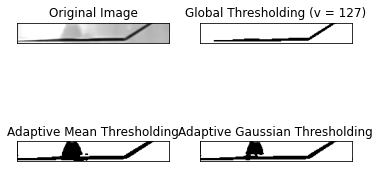

In [50]:
img = cv2.imread('D:\Volvo\BatteryLid Images Gabor\WIN_20240307_14_59_52_Pro_311_000030.jpg', 0)

img = cv2.medianBlur(img,3)
 
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY, 101, 11)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY, 101, 11)
 
titles = ['Original Image', 'Global Thresholding (v = 127)',
 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
 
for i in range(4):
 plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [2]:
image_files = glob.glob("D:\Volvo\BatteryLid Images Cycle\*.*")
image_files.sort(key=os.path.getmtime)

for image_file in image_files:
    img = cv2.imread(image_file, 0) 
    img2 = img.reshape(-1)
                        
    kernels = []  #Create empty list to hold all kernels that we will generate in a loop  
    
    ksize = 5  #Try 15 for hidden image. Or 9 for others
    sigma = 3
    theta = 0
    lamda = (np.pi / 4) * 3    
    gamma = 0.9
    phi   = 0  #0.8 for hidden image. Otherwise leave it to 0
    
    
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)    
    kernels.append(kernel)
    #Now filter the image and add values to a new column 
    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)                
    filtered_img = fimg.reshape(-1)
    
    img_file_name = os.path.splitext(os.path.basename(image_file))[0] 
    print(image_file)

    cv2.imwrite('D:/Volvo/BatteryLid Images Gabor Cycle Whole/' + img_file_name + '.jpg', filtered_img.reshape(img.shape))

D:\Volvo\BatteryLid Images Cycle\BatteryLid000001_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000001_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000002_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000002_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000003_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000003_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000004_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000004_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000005_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000005_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000006_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000006_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000007_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000007_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000008_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000008_1.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid000009_0.jpg
D:\Volvo\BatteryLid Images Cycle\BatteryLid00000